# Lista de ejercicios y guía de trabajo:

## Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Tingues en compte que prèviament et caldrà preparar el dataset.

## Exercici 2

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

## Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.


# Ejercicio 1

## Parte 1 - Carga y preprocesado del dataset

In [1]:
import pandas as pd
import numpy as np

thai = pd.read_csv("Facebook_thai.csv", sep=",") #el separador es una coma

thai.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Observo varias cosas: 
- En primer lugar, aparecen 4 columnas al final que no contienen ninguna información. 
- En segundo lugar, en status published, se recogen al mismo tiempo la hora y la fecha (y se registra como un objeto). 

Antes de proceder con la estandarización de los datos, vamos a solucionar esos problemas

In [3]:
thai = thai.drop(columns=['Column1', 'Column2', 'Column3','Column4']) #elimino las columnas innecesarias

thai.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Columnas eliminadas Ahora voy a dividir la información contenida en la columna "status published". 

Para ello, en un primer lugar pasaré de un tipo objeto a un tipo fecha (daytime64)

In [4]:
from datetime import datetime 

thai['status_published'] = pd.to_datetime(thai['status_published'])

In [5]:
thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 661.1+ KB


De cara a analizar los datos, considero que es más útil tener por **separado la hora y el día** en la que se realizaron las publicaciones. Por ejemplo, podría ser que algunas horas del día fueran más favorables para las publicaciones, independientemente del día en que se publicaron.

Por tanto, crearé dos nuevas columnas:

In [6]:
thai['fecha'] = pd.to_datetime(thai['status_published']).dt.strftime('%d/%m/%Y') #uso .dt. Esta columna tendrá la fecha
thai['hora'] = pd.to_datetime(thai['status_published']).dt.strftime('%H:%M') #Y esta columna tendrá la hora

thai.info()
thai.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  fecha             7050 non-null   object        
 13  hora              7050 non-null   object        
dtypes: datetime64[ns](1), in

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,fecha,hora
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,22/04/2018,06:00
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,21/04/2018,22:45
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,21/04/2018,06:17
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,21/04/2018,02:29
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,18/04/2018,03:22


In [7]:
thai['fecha'] = pd.to_datetime(thai['fecha'], infer_datetime_format=True) #transformo la fecha a formato datetime64
thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  fecha             7050 non-null   datetime64[ns]
 13  hora              7050 non-null   object        
dtypes: datetime64[ns](2), in

In [8]:
thai.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,fecha,hora
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018-04-22,06:00
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018-04-21,22:45
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018-04-21,06:17
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018-04-21,02:29
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018-04-18,03:22


Para facilitar los análisis, voy a pasar estas dos nuevas columnas a formato int. Para ello tendré que hacer algunas transformaciones adicionales:

In [9]:
thai['hora']=thai['hora'].str.replace(':','') #Extraigo los dos puntos de la columna hora
thai['hora'] = thai['hora'].astype('int64') #Convierto ese mismo número en un int
thai.head()
thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  fecha             7050 non-null   datetime64[ns]
 13  hora              7050 non-null   int64         
dtypes: datetime64[ns](2), in

In [10]:
thai["fecha"] = thai["fecha"].values.astype(np.int64) // 10 ** 9 #Lo paso a formato Unix epoch
#Este tipo de formato cuenta los segundos que han pasado desde una fecha referencia (1-1-1970)
thai.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,fecha,hora
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,1524355200,600
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,1524268800,2245
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,1524268800,617
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,1524268800,229
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,1524009600,322


In [11]:
thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  fecha             7050 non-null   int64         
 13  hora              7050 non-null   int64         
dtypes: datetime64[ns](1), in

A continuación vamos a estandarizar, con el pricipal objetivo de que las diferentes magnitudes no afecten a la hora de analizar los datos. Dejo fuera de esta normalización las tres primeras columnas, ya que:

- No tiene sentido normalizar la ID de los individuos
- La segunda columna corresponde a una variable categórica, que tampoco tiene sentido normalizar
- La tercera columna está en formato fecha. Esta misma info está englobada en las dos últimas columnas.


In [12]:
from sklearn.preprocessing import StandardScaler

thai2=thai.copy()

#list for cols to scale
cols_to_scale = ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys','fecha','hora']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(thai2[cols_to_scale])

#scale selected data
thai2[cols_to_scale] = scaler.transform(thai2[cols_to_scale])
thai2.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,fecha,hora
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,0.748541,-0.304927
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0.747096,2.078231
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0.747096,-0.280299
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0.747096,-0.842406
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0.742762,-0.707674


Lo tenemos, preprocesado acabado! Prosigo empezando con los análisis de clusterización

# Ejercicio 1

## Parte 2 - Clustering con K-means

Para este ejercicio, partiré de las siguientes premisas:

1. **No voy a usar variables categóricas**. Después de investigar, para poder hacer un mix de ambos tipos de variables debería usar tipos específicos de distancia (Gower). 
2. **No voy a hacer split train - test**. Por lo que he podido ver, al tratarse de algoritmos no supervisados, no es necesario hacer comprobaciones con parte del dataset, ya que no tenemos una variable específica para predecir.
3. **Usaré las dos últimas columnas en lugar de status published**. Ambas engloban la misma información

Usaré el método elbow junto con el algoritmo knee para encontrar el número adecuado de clusters

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
X = thai2[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys','fecha','hora']]
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,fecha,hora
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,0.748541,-0.304927
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0.747096,2.078231
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0.747096,-0.280299
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0.747096,-0.842406
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0.742762,-0.707674


En primer lugar, usaré el **método de Elbow** para determinar el número apropiado de clusters

In [15]:
#Código extraido de: https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python

kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


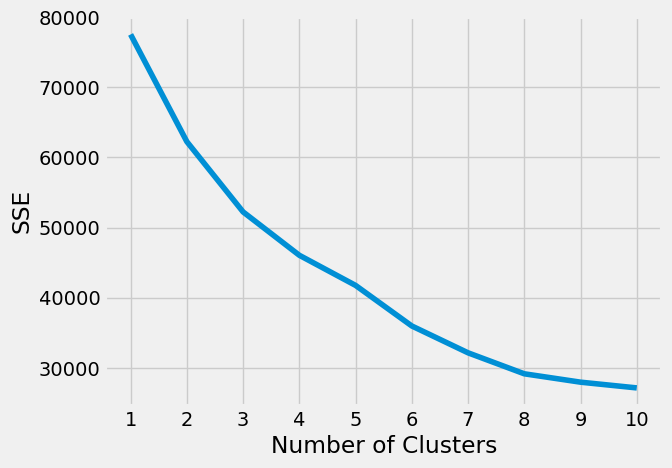

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [17]:
#Como el elbow no lo veo claro, usaré la función del paquete kneed
#OJO! Para ello he instalado el paquete desde la Prompt de Anaconda usando: conda install -c conda-forge kneed

from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

6

Lo tenemos! Ahora vamos a aplicar ese mismo número de clusters para efectuar nuestro análisis:

In [18]:
kmeans = KMeans(init="random",n_clusters=6,n_init=10,max_iter=300,random_state=42)

In [19]:
a=kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(a)
print(y_kmeans)

KMeans(init='random', n_clusters=6, random_state=42)
[4 2 4 ... 2 4 4]


In [20]:
a.labels_[:40]

array([4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

Y ahora vamos a plotear los resultados del k-means.

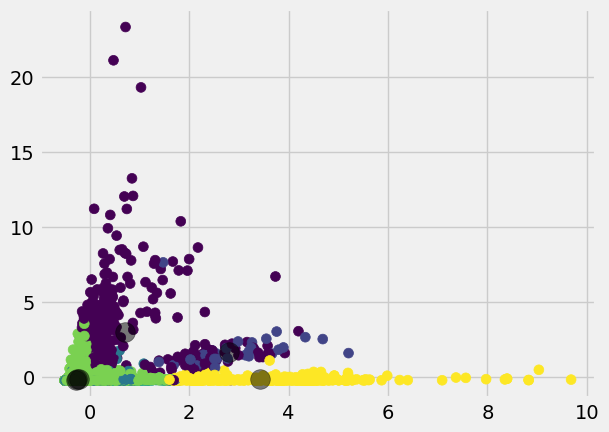

In [21]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis') #Se tiene que usar iloc para acceder a los array

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Ejercicio 2

## Clustering jerárquico

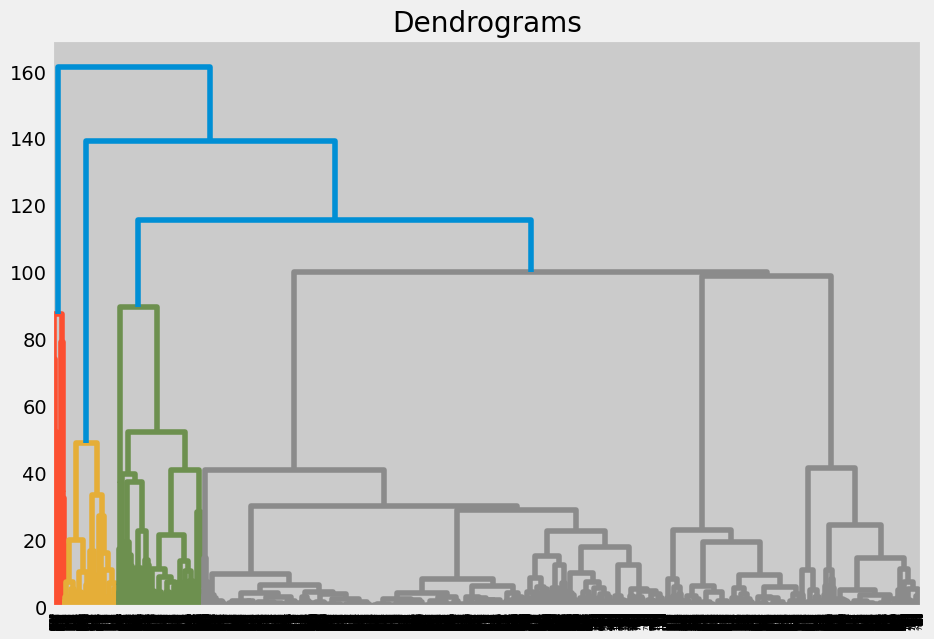

In [22]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

Gracias al dendograma tenemos una idea del número de clusters que probar. Decido probar 4 clusters y 6 (que serían los mismos usados en el Kmeans). Empiezo por 4:

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster1.fit_predict(X)
labels1 = cluster1.labels_
print(labels1)

[1 0 0 ... 0 0 0]


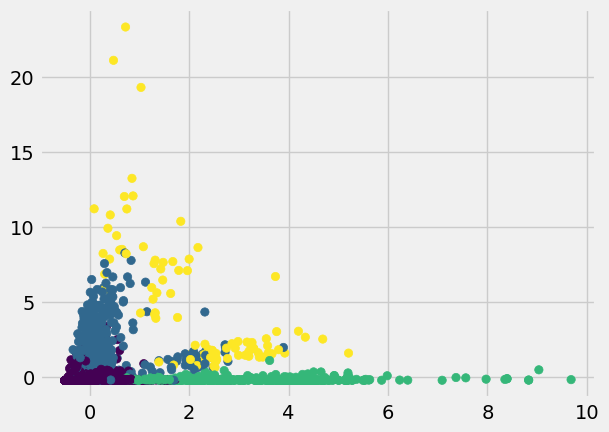

In [24]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels1, cmap='viridis') #Se tiene que usar iloc para acceder a los array

Ahora haremos la prueba con 6 clusters:

In [25]:
cluster2 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster2.fit_predict(X)
labels2 = cluster2.labels_
print(labels2)

[0 3 4 ... 3 4 4]


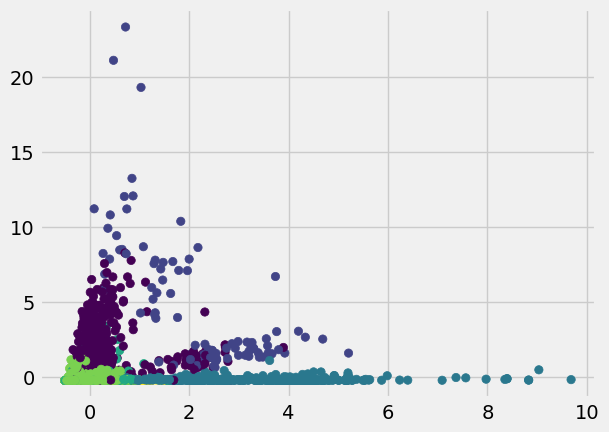

In [26]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels2, cmap='viridis') #Se tiene que usar iloc para acceder a los array

El resultado es, a simple vista, bastante similar con el K-means. He de decir que a "ojo" resulta difícil de clasificar, pero quizás de manera intuitiva lo haría algo distinto a cómo lo están haciendo estos dos métodos

# Ejercicio 3

## Cálculo de los rendimientos del clustering

A continuación, voy a calcular los rendimientos de los distintos modelos de clustering. Empezaré probando el Silhouette Score, pero también aprovecharé para probar el Calinski harabasz score.

Me habría gustado también probar el ARI (adjusted rand index), pero para ello debería tener algunos grupos predefinidos previamente (que no es el caso).

In [27]:
kmeans_silhouette = silhouette_score(X, a.labels_).round(5)
HC4_silhouette = silhouette_score(X,  cluster1.labels_).round (5) #me aseguro usando distintas notaciones que todo está correcto
HC6_silhouette = silhouette_score(X, labels2).round (5)

In [28]:
kmeans_silhouette

0.46212

In [29]:
HC4_silhouette

0.4925

In [30]:
HC6_silhouette

0.4669

Segun el Silhouette score no hay muchas diferencias! Recordemos que cuando más cercano esté el valor a 1, mejor clusterización.

Veamos qué ocurre con el CH:

In [31]:
from sklearn.metrics import calinski_harabasz_score
ch_index1 = calinski_harabasz_score(X, a.labels_)
ch_index2 = calinski_harabasz_score(X, labels1)
ch_index3 = calinski_harabasz_score(X, labels2)

In [32]:
ch_index1

1628.8675102719708

In [33]:
ch_index2

1431.7347465439018

In [34]:
ch_index3

1443.2747587485305

Unos valores más altos de CH significan un mejor clustering, ya que implica que las observaciones dentro de un cluster están más juntas entre ellas, mientras que las observaciones de distintos clusters están más apartadas entre ellas (es decir, en global observamos una mejor separación). Por tanto, según CH, el cluster realizado con Kmeans nos estaría dando mejores resultados.

Si por ejemplo sospechasemos que los clusterings nos van a reflejar el tipo de archivo subido (foto vs video), podríamos haber realizado un ARI. No lo he incluído en este ejercicio, pero sería una posbilidad a contemplar